In [0]:
import pandas as pd
import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [505]:
df = pd.read_csv('./UCI_data.csv',parse_dates=['date'])
df = df.set_index('date')
df['hour'] = df.index.hour
df = df.resample('1H').mean()
df.reset_index(drop=True, inplace=True)
df

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy,hour
0,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,6.586667,84.260000,17.177778,41.400000,18.150000,48.710556,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044,90.000000,17.0
1,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,6.180000,87.204444,17.229583,42.046806,18.094444,48.597222,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206,228.333333,18.0
2,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,5.857361,88.131389,17.850000,45.017778,18.156111,49.213333,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932,198.333333,19.0
3,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,5.469444,86.933889,17.632222,42.920000,18.773333,50.195556,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642,160.000000,20.0
4,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,5.578889,86.129444,17.863611,43.618333,19.153333,49.542222,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274,126.666667,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,25.544444,46.638889,26.421369,41.205054,28.397778,41.160000,24.666667,45.883889,22.890000,53.052222,25.567222,1.000000,23.968048,43.342905,23.848333,49.253056,23.100000,46.594444,21.916667,755.800000,59.000000,2.000000,21.583333,13.475000,27.553946,27.553946,103.333333,14.0
3286,25.500000,45.677639,26.154762,41.041238,28.240000,40.306667,24.694444,45.270000,23.007500,52.368611,26.279444,1.000000,24.045238,43.189905,23.926667,48.883333,23.138889,46.590000,22.216667,755.675000,57.333333,2.000000,21.833333,13.258333,25.429025,25.429025,76.666667,15.0
3287,25.487778,46.250000,26.000000,41.736190,27.953333,40.607778,24.700000,45.476667,23.150000,52.094444,26.138889,1.000000,24.353333,44.330905,24.271444,50.785667,23.193333,46.645381,22.883333,755.375000,55.000000,2.416667,22.583333,13.283333,23.229344,23.229344,135.000000,16.0
3288,25.533333,46.783333,25.772190,42.495476,27.164444,41.247778,24.700000,45.658889,23.210000,52.296667,24.441111,1.000000,24.516190,44.515381,24.671528,50.058514,23.200000,46.780655,22.666667,755.200000,55.833333,3.416667,24.083333,13.316667,27.186003,27.186003,183.333333,17.0


In [506]:
df.shape

(3290, 28)

In [507]:
from sklearn import preprocessing

partial_data = df

x = partial_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
complete_normalized_data = pd.DataFrame(x_scaled)

train_data= complete_normalized_data[1:1501]
test_data = complete_normalized_data[1502:3002]

print(f'Training data: {len(train_data)} Test data: {len(test_data)}')

Training data: 1500 Test data: 1500


In [508]:
train_result = train_data.pop(train_data.columns[len(train_data.columns)-1])
print(train_result)
train_data.head()

1       0.782609
2       0.826087
3       0.869565
4       0.913043
5       0.956522
          ...   
1496    0.043478
1497    0.086957
1498    0.130435
1499    0.173913
1500    0.217391
Name: 27, Length: 1500, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
1,0.330146,0.693962,0.232532,0.712017,0.215255,0.766894,0.344809,0.787553,0.173603,0.383167,0.355436,0.871632,0.172990,0.671664,0.159869,0.650999,0.217655,0.671838,0.352904,0.113897,0.887402,0.397351,0.6,0.512466,0.444954,0.444954,0.336134
2,0.393650,0.955627,0.280717,0.761334,0.239314,0.886461,0.350342,0.866934,0.176064,0.396956,0.345965,0.881005,0.231986,0.778338,0.165566,0.672268,0.209388,0.672732,0.354792,0.126142,0.862876,0.443709,0.6,0.500192,0.742484,0.742484,0.285714
3,0.443107,0.791213,0.304607,0.748295,0.253096,0.888561,0.370387,0.931040,0.223258,0.677624,0.334577,0.868897,0.211277,0.703016,0.222591,0.706174,0.208117,0.664685,0.354792,0.137609,0.833891,0.443709,0.6,0.482931,0.532446,0.532446,0.221289
4,0.480347,0.689781,0.329311,0.727887,0.266689,0.832701,0.391639,0.871624,0.303155,0.600493,0.337790,0.860763,0.233280,0.728090,0.257699,0.683621,0.208117,0.651679,0.349398,0.144218,0.831661,0.443709,0.6,0.473725,0.353747,0.353747,0.165266
5,0.508026,0.648037,0.352629,0.702292,0.274882,0.815758,0.453508,0.852914,0.370652,0.354595,0.345161,0.851935,0.224854,0.703894,0.275202,0.665479,0.204648,0.639968,0.345891,0.154519,0.833891,0.476821,0.6,0.470272,0.570621,0.570621,0.436975


In [509]:
test_result = test_data.pop(test_data.columns[len(test_data.columns)-1])
print(test_result)
test_data.head()

1502    0.304348
1503    0.347826
1504    0.391304
1505    0.434783
1506    0.478261
          ...   
2997    0.608696
2998    0.652174
2999    0.695652
3000    0.739130
3001    0.782609
Name: 27, Length: 1500, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
1502,0.350449,0.299185,0.031390,0.578822,0.265268,0.374751,0.373028,0.210908,0.296013,0.268618,0.148890,0.686239,0.530702,0.362335,0.554095,0.385644,0.457856,0.460216,0.156806,0.918562,0.874025,0.331126,0.914103,0.228999,0.712471,0.712471,0.030812
1503,0.341006,0.276603,0.033795,0.545561,0.256174,0.342437,0.365684,0.184380,0.297584,0.246875,0.169608,0.688115,0.499137,0.257930,0.532918,0.281775,0.463059,0.434611,0.176767,0.924004,0.838350,0.350993,0.935897,0.238588,0.431965,0.431965,0.344538
1504,0.341006,0.260212,0.134071,0.489634,0.251912,0.308298,0.403359,0.195803,0.283249,0.257905,0.209324,0.637024,0.481070,0.212629,0.515621,0.249724,0.477685,0.362883,0.212911,0.922060,0.777035,0.476821,0.966667,0.255850,0.377956,0.377956,0.215686
1505,0.348088,0.226233,0.272075,0.371339,0.275734,0.299784,0.450138,0.155886,0.273679,0.245518,0.263580,0.533291,0.474097,0.186957,0.496732,0.193302,0.470170,0.366204,0.247977,0.918367,0.712375,0.456954,0.984615,0.265056,0.691639,0.691639,0.770308
1506,0.387099,0.297412,0.352711,0.372048,0.390206,0.351064,0.472522,0.192298,0.270945,0.228167,0.301421,0.458915,0.497499,0.173827,0.482206,0.144495,0.468262,0.397098,0.270635,0.916035,0.682274,0.397351,0.696154,0.278097,0.779062,0.779062,0.305322


In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(30, activation='elu'),
  tf.keras.layers.Dense(15, activation='elu'),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError())

In [511]:
result = model.fit(train_data,train_result,epochs=20,validation_data=(test_data,test_result))

Epoch 1/20
47/47 [==============================] - 0s 5ms/step - loss: 0.3172 - val_loss: 0.2669
Epoch 2/20
47/47 [==============================] - 0s 4ms/step - loss: 0.1478 - val_loss: 0.2008
Epoch 3/20
47/47 [==============================] - 0s 4ms/step - loss: 0.1139 - val_loss: 0.1270
Epoch 4/20
47/47 [==============================] - 0s 4ms/step - loss: 0.0902 - val_loss: 0.0982
Epoch 5/20
47/47 [==============================] - 0s 4ms/step - loss: 0.0755 - val_loss: 0.0795
Epoch 6/20
47/47 [==============================] - 0s 5ms/step - loss: 0.0657 - val_loss: 0.0838
Epoch 7/20
47/47 [==============================] - 0s 4ms/step - loss: 0.0590 - val_loss: 0.0719
Epoch 8/20
47/47 [==============================] - 0s 4ms/step - loss: 0.0546 - val_loss: 0.0747
Epoch 9/20
47/47 [==============================] - 0s 4ms/step - loss: 0.0518 - val_loss: 0.0735
Epoch 10/20
47/47 [==============================] - 0s 4ms/step - loss: 0.0486 - val_loss: 0.0681
Epoch 11/20
47/47 [

In [512]:
model.evaluate(test_data,test_target)

47/47 [==============================] - 0s 1ms/step - loss: 0.0668


0.06683754920959473

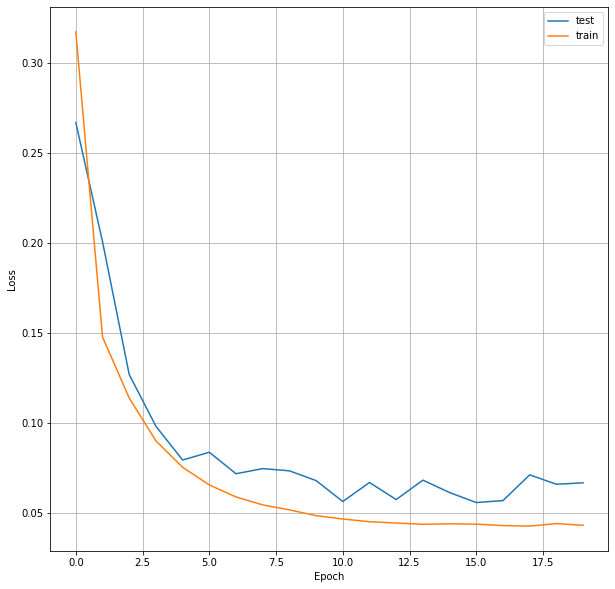

In [513]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(result.history['val_loss'])
plt.plot(result.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['test','train'], loc='upper right')
plt.show()